## Explainable CNN


https://github.com/ashutosh1919/explainable-cnn


https://github.com/ashutosh1919/explainable-cnn/blob/main/examples/explainable_cnn_usage.ipynb

layer-wise network visualization

CNN network구조는 수학적인 form으로 정의하기 어렵다. approximate한 함수로는 설명가능.
그래서 해석가능하지 않다.
보통, 네트워크의 중간과정들, 중간의 feature map을 visualize하면서 CNN을 해석하려고 한다.
CNN의 낮은 layer에서는 low level geometry를 찾고(선,edge,circle 등 모양을 찾음), middle , high level로 갈수록 사람의 얼굴, 몸통, 차의 부분들을
CNN filter들이 capture하고있다. 





## Installing the package

To use the visualization module, we have created python pip package called `explainable-cnn` which you can install in your system using below command.

In [1]:
! pip install explainable-cnn

## Import and Usage

Currently, `explainable-cnn` contains only single usable class which you may want to use: `CNNExplainer`. This class consists of multiple methods to visualize GradCAM, Guided GradCAM, Guided Backpropagation and Saliency maps.

In [2]:
from explainable_cnn import CNNExplainer       
import pickle, torch                    ## pickle : binary file을 가져올때 pytorch에서 주로 사용하는 모듈이다.
from torchvision import models
import matplotlib.pyplot as plt

from PIL import Image

We are using [ImageNet](https://www.image-net.org/) dataset for examples and that is why we also need the labels which are used for training the model. We are also taking pre-trained [`ResNet18`](https://pytorch.org/hub/pytorch_vision_resnet/) model from PyTorch.

In [3]:
## imagenet의 class label이 있어야한다. 어떤 클래스의 activation을 visualize할지 알아야하니깐.
## 1000개의 class에 대해 dictionary형태로 불러와진다.

with open("./data/2-3.explainable_cnn_imagenet_class_labels.pkl", "rb") as label_file:
    imagenet_class_labels = pickle.load(label_file)
imagenet_class_labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [4]:
model = models.vgg16(pretrained=True)   ## instance를 만들어준다.

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\hello/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Create instance of `CNNExplainer` which takes model and class label pair (`dict`) as input.

In [5]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

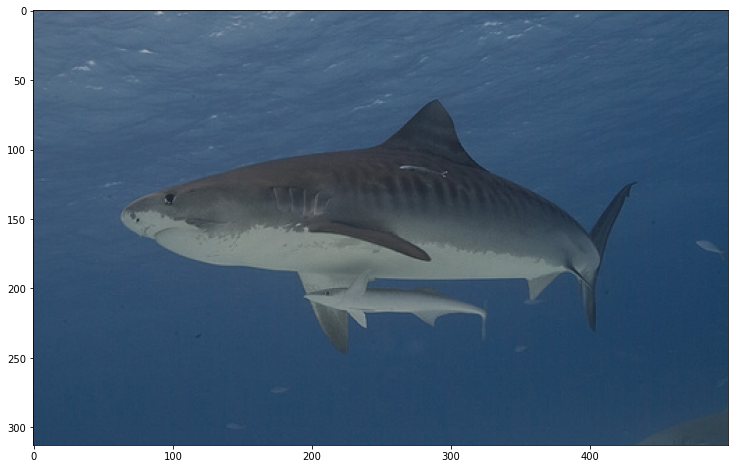

tiger shark, Galeocerdo cuvieri
500 313


In [10]:
## Load a sample image

image = Image.open('./data/2-3.explainable_cnn_tiger_shark.jpeg').convert('RGB')

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

print(imagenet_class_labels[3])

w,h = image.size
print(w,h)

### Saliency Maps

[Saliency Maps](https://en.wikipedia.org/wiki/Saliency_map#:~:text=In%20computer%20vision%2C%20a%20saliency,to%20the%20human%20visual%20system.) will create heatmap which denotes the area of image where human eye focuses first. Note that the package supports generating saliency map for a model and not layer-wise. You can use `get_saliency_map()` function to get the numpy drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L289-L305).

saliency map은 도드라진 위치를 말해줄수있다.
사람이 보기에 가장 highlight한 위치를 caliency map이라 한다.
우천시 상황에서 구름이 있는 상황이 saliency한 상황.

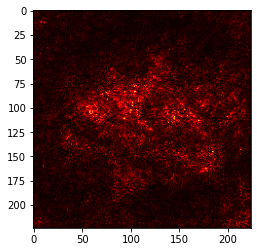

In [11]:
## image path위치, 얻고싶은 class label, network input size를 넣어준다.
saliency_map = x_cnn.get_saliency_map(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3, # Label corresponding to Shark. You can pass either 3 or "tiger shark, Galeocerdo cuvieri",
    (224, 224)          ## network의 input size
)

plt.imshow(saliency_map, cmap="hot")

### Guided Backpropagation

[Guided Backpropagation](https://medium.com/@chinesh4/generalized-way-of-interpreting-cnns-a7d1b0178709) is similar technique which combines Vanilla Backpropagation and Deconvolution. Similar to Saliency maps, guided backpropagation supports only for entirely for model and not layer-wise. You can use `get_guided_back_propagation()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L246-L261).

c:\Users\hello\anaconda3\envs\pt17_py38\lib\site-packages\torch\nn\modules\module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


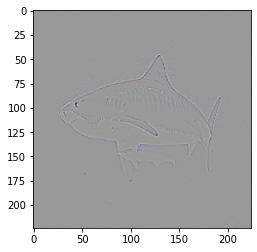

In [13]:
## backpropagation을 통해서 image의 input쪽으로 넘어온 형태가 나온다. 즉 이쪽형태로 학습이 된것을 확인가능하다.
guided_backprop = x_cnn.get_guided_back_propagation(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3,
    (224, 224)
)

plt.imshow(guided_backprop.astype('uint8'))

### Grad CAM

[Grad CAM](https://arxiv.org/abs/1610.02391) is more sophisticated technique to draw visualization based on class confidence over an image. Unlike above two, Grad CAM supports layer-wise image extraction in this package. You can use `get_grad_cam()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L131-L148).

class confidence에 초점을 맞춘 기법.
layer-wise로 image를 뽑아낼수 있고,  get_grad_cam() 함수를 사용하면 drawable(당길수있는) numpay array를 얻을수있다

In [15]:
## feature layer와 avgpool layer, classifier layer가 있다
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

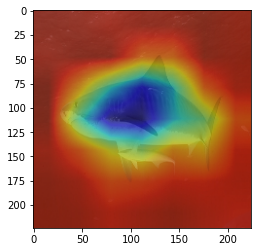

In [19]:
grad_cam = x_cnn.get_grad_cam(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"]  # List of layer names for which you want to generate image.       ## models.vgg16에서 feature layer를 통과된걸 보고싶기때문에 지정함.
)

# Note that get_grad_cam() returns list of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))
## 아래 사진에서 파란색영역을 보고 shark라고 판단했음을 알수있다.

### Guided Grad CAM

[Guided Grad CAM](https://medium.com/@mohamedchetoui/grad-cam-gradient-weighted-class-activation-mapping-ffd72742243a) is a gradient-weighted class activation mapping which combines Guided Backpropagation and Grad CAM functionality. Similar to Grad CAM, Guided Grad CAM supports layer-wise image extraction in this package. You can use `get_guided_grad_cam()` to get drawable numpy array. To see full list of arguments and their usage, please refer to the [docstring](https://github.com/ashutosh1919/explainable-cnn/blob/main/src/explainable_cnn/explainers/cnn_explainer.py#L187-L203).

grad Cam과 비슷하게 layer-wise로 출력할수 있고 map이 나온다.
cam classification map을 가지고 어떤 위치가 saliency한지 중요한지에 대해서 알려줄수있다.
semantic segmentation 같은 sudo label을 줄수도 있다

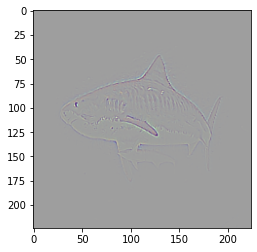

In [20]:
model
guided_grad_cam = x_cnn.get_guided_grad_cam(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"]
)

plt.imshow(guided_grad_cam[0].astype('uint8'))

## Layerwise Comparison

One can easily draw layerwise comparison of Grad CAM and Guided Grad CAM plots to easily understand the working of CNN model. Below, we have given such example. We have defined the layers for which we will generate images.

resnet을 이용해서 layerwiser를 visualization해보자
resnet은 vgg와 달리 feature extractor가 여러개의 layer로 구성되어있다
먼저 conv, batchnorm,relu,maxpool을 통과하고 
그다음 layer1을 감싸서 통과하고
layer2,layer3을 통과하는방식이다.
그래서 총 layer가 4개가 있는데 
layer4개에 대해서 output들을 각각 grad cam visualize해보자.

In [21]:
model = models.resnet50(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\hello/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

In [23]:
# Note that the name of layers should exactly match with model.
layers = ["relu", "layer1", "layer2", "layer3", "layer4"]

In [24]:
# Grad CAMs of the model
grad_cams = x_cnn.get_grad_cam(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3,
    (224, 224),
    layers
)

# Guided Grad CAMs of the model
guided_grad_cams = x_cnn.get_guided_grad_cam(
    "./data/2-3.explainable_cnn_tiger_shark.jpeg",
    3,
    (224, 224),
    layers
)

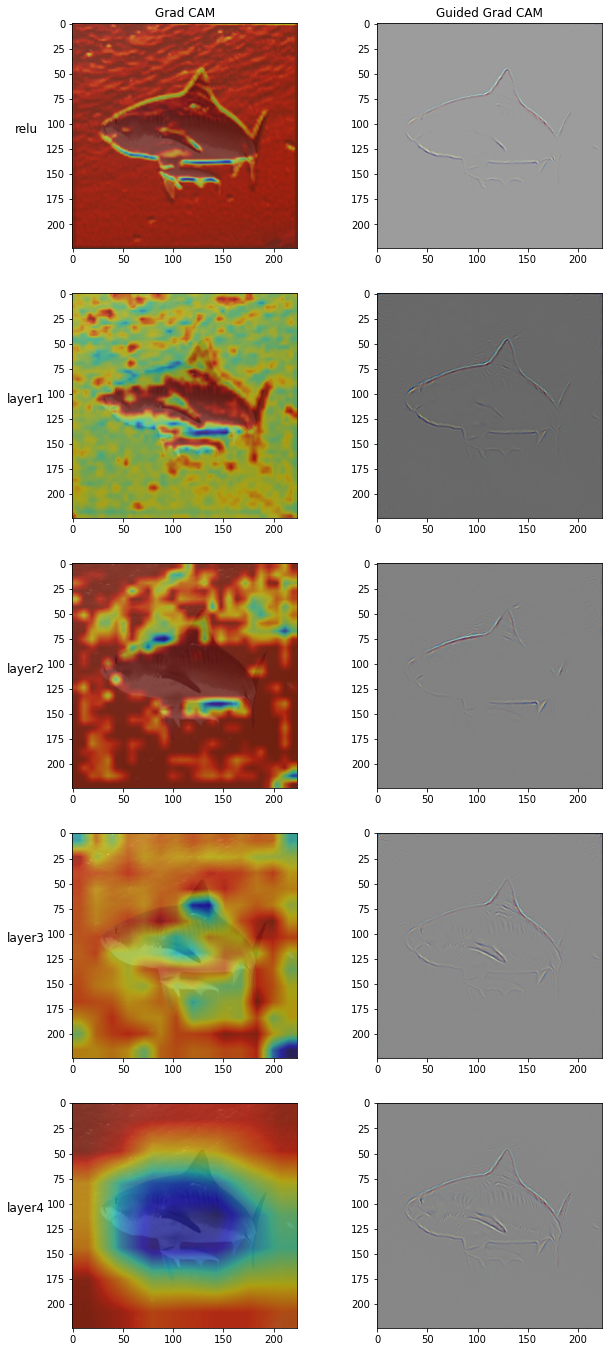

In [25]:
cols = ["Grad CAM", "Guided Grad CAM"]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 24))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)
    
for ax, row in zip(axes[:,0], layers):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=20)
    
for ax, cam in zip(axes[:, 0], grad_cams):
    ax.imshow(cam.astype('uint8'))

for ax, gcam in zip(axes[:, 1], guided_grad_cams):
    ax.imshow(gcam.astype('uint8'))

# plt.xlabel("x",labelpad=10)

## 5개의 layer에 대해 결과를 보여준다.
## relu 통과했을때의 activation map을 보여주고
## layer1 통과했을때 지엽적인 부분에 대한 activation map이 보여짐
## layer2는 중요하게 생각했던 영역에 대해 보여주고
## layer3과 4로 갈수록 점점 중요하게 생각한 영역을 잡는걸 볼수있다.(파란색을 보면된다.)